## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

##  Upload and display image

In [2]:
image = cv2.imread('data/test.jpg')
ratio = image.shape[0] / 500.0
orig = image.copy()
image = cv2.resize(image, (int(image.shape[1] / ratio), 500))

In [3]:
#   Function for displaying Image
def display_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

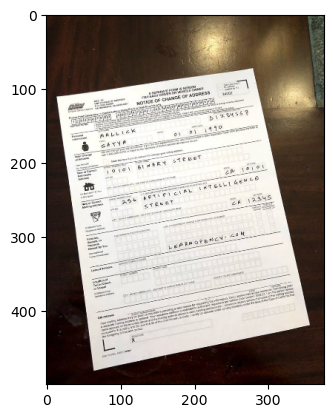

In [4]:
display_image(image)

## Edge Detection

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)

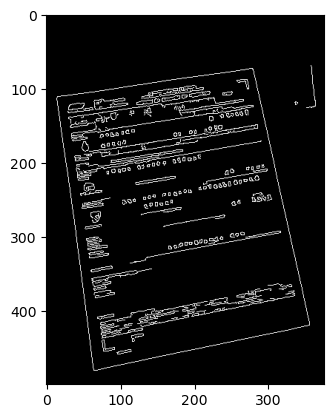

In [6]:
display_image(edged)

## Contour Detection

In [7]:
#   Finding contours and keeping only the largest ones

contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

In [8]:
#   Getting approximate contours

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        screenCnt = approx
        break

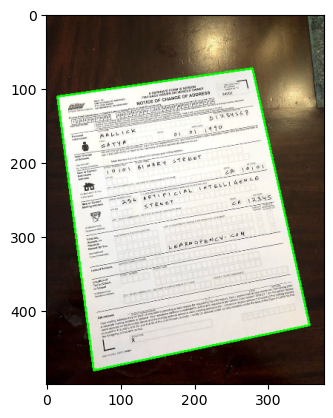

In [9]:
#   Displaying the image with the approx value of contours

cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
display_image(image)

##  Detecting Corners

In [10]:
#   Function for finding the correct order of the points detected

def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

In [11]:
rect = order_points(screenCnt.reshape(4, 2) * ratio)
(tl, tr, br, bl) = rect

In [12]:
# Calculating the maximum width of the image
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))

In [13]:
#   Calculating the maximum height of the image
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))

In [14]:
#Performing perspective transformation

dst = np.array([[0, 0], [maxWidth - 1, 0], [maxWidth - 1, maxHeight - 1], [0, maxHeight - 1]], dtype="float32")
M = cv2.getPerspectiveTransform(rect, dst)
warped = cv2.warpPerspective(orig, M, (maxWidth, maxHeight))

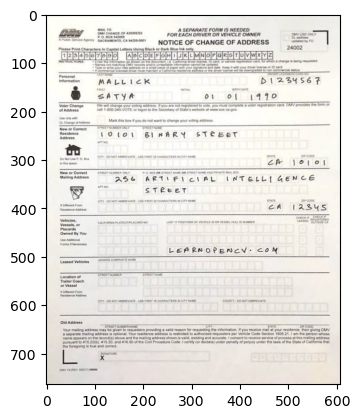

In [15]:
#   Final Image
display_image(warped)